# 배달 데이터 그룹화에 따른 변화 살펴보기


* 그룹화는 비슷한 집단끼리 묶어줌에 따라 정보의 특성을 더 활용도 있게 살펴 볼 수 있다고 봄.

* 예를 들면 시도로 나누는 방법, 시군구로 나누는방법이 대표적이며, 

* 때에 따라서는 코로나확진자수가 많이나온 지역, 1인가구 또는 아파트비율이 높고낮게 형성된 지역에 따라

* 배달데이터 건수 또는 배달품목의 변화가 있을것으로 보고 분류(군집)분석을 초점에서 분석을 실시했습니다.

In [3]:
# 배달 데이터 분석

# 사용한 데이터셋

delivery   : 배달 호출 데이터
covid_conf : 코로나확진자수,사망자수 출처: 통계청
        
# 데이터 셋 열

- Delivery 데이터 전처리
# 사용한 배달 호출 정보 데이터 열
PROCESS_DT : 처리일시
DLVR_STORE_ID : 배달상점ID
DLVR_STORE_INDUTY_NM : 배달상점 업종이름
DLVR_DSTN_SIDO : 배달목적지 주소 법정동 시도명
DLVR_DSTN_SIGUNGU : 배달목적지 주소 법정동 시군구명
DLVR_DSTN_DONG : 배달목적지 주소 법정동 읍면동명
DLVR_DSTN_ADSTRD_CODE : 배달목적지 주소 행정동 코드
DLVR_DSTN_RDNMADR_CODE : 배달목적지주소 도로명주소 코드
GOODS_AMOUNT : 배달상품금액
SETLE_KND_VALUE : 결제종류번호 (1:카드, 2:선불, 3:현금)
DLVR_RCEPT_TIME : 배달접수시간
    
- Covid 데이터
conf : 확진자 수
death : 사망자 수

SyntaxError: invalid syntax (<ipython-input-3-036a9cfae797>, line 5)

In [11]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=34471d5018d6c7fe70c3bb0620f92749c98b04fb0a51ae118217f90b2fbbd327
  Stored in directory: c:\users\박성진~1\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt


from IPython.display import Image

In [2]:
# 그래프 그리기 위한 plotly
import plotly.express as px

import plotly.io as pio
pio.renderers.default = "notebook_connected"

import plotly.offline as pyo
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

In [3]:
# -*- coding: utf-8 -*-

import pandas as pd

file_path = '../data/delivery.csv'
delivery = pd.read_csv(file_path, sep = ',', encoding='utf-8')
delivery

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158319,10672688,2020-06-21,C000312,1,C000312,S0029529,야식,4125010200,경기도,동두천시,...,D0013004,3000,500,26000,1,승인:하나카드,2020-06-21 22:48:22,2020-06-21 22:48:37,2020-06-21 23:07:47,NaN
5158320,10672689,2020-06-21,C000026,1,C000026,S0026242,야식,1132010800,서울특별시,도봉구,...,D0006251,3600,55,22000,2,NaN,2020-06-21 22:57:15,2020-06-21 22:58:00,2020-06-21 23:18:20,NaN
5158321,10672690,2020-06-21,C000130,1,C000130,S0042234,야식,4128112300,경기도,고양시 덕양구,...,D0012754,3000,300,17000,2,NaN,2020-06-21 22:55:08,2020-06-21 22:55:22,2020-06-21 23:14:45,NaN
5158322,10672691,2020-06-21,C000237,1,C000237,S0021766,족발/보쌈,4121010200,경기도,광명시,...,D0004485,3630,200,53700,1,승인:비씨카드사,2020-06-21 23:10:38,2020-06-21 23:11:03,2020-06-21 23:25:10,NaN


In [5]:
del_dstn = delivery.loc[:,['PROCESS_DT','DLVR_STORE_ID','DLVR_DSTN_SIDO','DLVR_DSTN_SIGUNGU','DLVR_DSTN_DONG',
                'DLVR_DSTN_ADSTRD_CODE','DLVR_DSTN_RDNMADR_CODE','DLVR_STORE_INDUTY_NM','GOODS_AMOUNT','SETLE_KND_VALUE','DLVR_RCEPT_TIME']]

In [6]:
# 열이름 간단하게 변경
del_dstn = del_dstn.rename({'DLVR_DSTN_SIDO':'si_name','DLVR_DSTN_SIGUNGU':'gu_name',
                            'DLVR_DSTN_DONG':'dong_name','DLVR_STORE_INDUTY_NM':'induty_nm','DLVR_DSTN_ADSTRD_CODE':'adstrd_code'},
                           axis = 'columns')

# 행정동코드 전처리
del_dstn.adstrd_code = del_dstn.adstrd_code.astype(str) 
del_dstn.adstrd_code = del_dstn.adstrd_code.apply(lambda x : x[:8])

# 날짜 타입 변경 및 년도, 월 열 만들기
del_dstn['PROCESS_DT'] = pd.to_datetime(del_dstn['PROCESS_DT'], format='%Y-%m-%d')
del_dstn['year'] = pd.DatetimeIndex(del_dstn['PROCESS_DT']).year
del_dstn['month'] = pd.DatetimeIndex(del_dstn['PROCESS_DT']).month
del_dstn.head()

,PROCESS_DT,DLVR_STORE_ID,si_name,gu_name,dong_name,adstrd_code,DLVR_DSTN_RDNMADR_CODE,induty_nm,GOODS_AMOUNT,SETLE_KND_VALUE,DLVR_RCEPT_TIME,year,month
0,2020-01-01,S0032342,경상남도,창원시 마산회원구,석전동,48127545,4.812748e+11,치킨,25000,1,2020-01-01 00:15:49,2020,1
1,2020-01-01,S0021847,서울특별시,금천구,가산동,11545510,1.154531e+11,찜탕,49000,2,2020-01-01 01:12:14,2020,1
2,2020-01-01,S0025740,서울특별시,은평구,갈현동,11380552,1.138041e+11,치킨,23000,3,2020-01-01 00:01:14,2020,1
3,2020-01-01,S0039634,경기도,의정부시,의정부동,41150510,4.115043e+11,한식,20000,2,2020-01-01 01:01:34,2020,1
4,2020-01-01,S0002237,경기도,고양시 덕양구,주교동,41281510,4.128144e+11,한식,32000,2,2020-01-01 01:05:06,2020,1


In [7]:
# DLVR_STORE_INDUTY_NM(업종 이름) 기준으로 묶어주기
deliveryname = del_dstn.groupby(['induty_nm']).size().reset_index(name='count')

deliveryname

,induty_nm,count
0,도시락,49254
1,돈까스/일식,251112
2,배달전문업체,94837
3,분식,626945
4,심부름,5344
5,아시안/양식,109185
6,야식,226043
7,족발/보쌈,415060
8,중식,187030
9,찜탕,214388


# 어떤 업종이 가장 많이 차지하는지 확인하기

In [8]:
# 막대 그래프 그리기
trace1 = go.Bar(x=deliveryname['induty_nm'], y=deliveryname['count'])
data = [trace1]
layout = go.Layout(title='업종별 배달비율')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

# 1순위 치킨 2 순위 한식 3순위 분식 4순위 카페디저트 5순위 족발 순이었다.

In [9]:
# DLVR_STORE_SIDO(배달 지역) 기준으로 묶어주기
districtname = del_dstn.groupby(['si_name']).size().reset_index(name='count')

districtname

,si_name,count
0,강원도,12632
1,경기도,2736607
2,경상남도,266602
3,경상북도,174840
4,광주광역시,11229
5,대구광역시,63024
6,대전광역시,65301
7,부산광역시,29792
8,서울특별시,818496
9,울산광역시,3


# 시도별 배달비율확인 (추후 어느지역을 중점적으로 분석할 것인가)

In [10]:
# 시도별 막대그래프

# 막대 그래프 그리기
trace1 = go.Bar(x=districtname['si_name'], y=districtname['count'])
data = [trace1]
layout = go.Layout(title='시도별 배달비율')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [118]:
# 상위 5개 시도의 주문개수

df_sort_group_top5 = districtname.sort_values(by="count", ascending=False).groupby("si_name").head(10)
df_sort5 = df_sort_group_top5.head(5)
df_sort5



,si_name,count
1,경기도,2736607
8,서울특별시,818496
2,경상남도,266602
3,경상북도,174840
14,충청남도,168084


In [119]:
# 상위 5개 막대 그래프 그리기
trace1 = go.Bar(x=df_sort5['si_name'], y=df_sort5['count'])
data = [trace1]
layout = go.Layout(title='시도별 배달비율')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

# 지역별로 컬럼을 만들고 음식업종 이름 살펴보기 (4집단으로 분류)
  * 지역별로 선호하는 음식의 기호가 다를 수 있다고 판단하고 각 지역별 주문된 음식에 대해 알고싶어서
  * 크게4개집단 나눔 
  * 서울특별시/경기/인천광역시
  * 경상남도/경상북도/대구광역시/부산광역시   
  * 전라남도/전라북도/광주광역시 
  * 충청남도/충청북도/대전광역시(concat 함수를 이용해서 생성)

In [120]:
# 그룹1 수도권 (서울특별시, 경기도, 인천광역시)
is_kgd = del_dstn['si_name'] == '경기도'
kgd = del_dstn[is_kgd]

is_seoul = del_dstn['si_name'] == '서울특별시'
seoul = del_dstn[is_seoul]

is_inch = del_dstn['si_name'] == '인천광역시'
inch = del_dstn[is_inch]

gr1 = pd.concat([kgd, seoul, inch])

In [121]:
# 그룹2 동남권 (경상남도/경상북도/대구광역시/부산광역시)
is_kn = del_dstn['si_name'] == '경상남도'
kn= del_dstn[is_kn]

is_kb = del_dstn['si_name'] == '경상북도'
kb = del_dstn[is_kb]

is_dk = del_dstn['si_name'] == '대구광역시'
dk = del_dstn[is_dk]

is_bs = del_dstn['si_name'] == '부산광역시'
bs = del_dstn[is_bs]

gr2 = pd.concat([kn, kb, dk, bs])

In [122]:
# 그룹3 호남권 (전라남도/전라북도/광주광역시)
is_jn = del_dstn['si_name'] == '전라남도'
jn = del_dstn[is_jn]

is_jb = del_dstn['si_name'] == '전라북도'
jb = del_dstn[is_jb]

is_kj = del_dstn['si_name'] == '광주광역시'
kj = del_dstn[is_kj]


gr3 = pd.concat([jn, jb, kj])

In [123]:
# 그룹4 호서권 (충청남도/충청북도/대전광역시)
is_cn = del_dstn['si_name'] == '충청남도'
cn = del_dstn[is_cn]

is_cb = del_dstn['si_name'] == '충청북도'
cb = del_dstn[is_cb]

is_djj = del_dstn['si_name'] == '대전광역시'
djj = del_dstn[is_djj]


gr4 = pd.concat([cn, cb, djj])

In [127]:
# 그룹1에서 많이시키는 빈도
gr11 = gr1.groupby(['induty_nm']).size().reset_index(name='count')

gr1_5 = gr11.sort_values(by="count", ascending=False).head(10)
gr1_sort5 = gr1_5.head(5)

In [126]:
# 상위 5개 막대 그래프 그리기
trace1 = go.Bar(x=gr1_sort5['induty_nm'], y=gr1_sort5['count'])
data = [trace1]
layout = go.Layout(title='시도별 배달비율')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [128]:
# 그룹2에서 많이시키는 빈도
gr22 = gr2.groupby(['induty_nm']).size().reset_index(name='count')

gr2_5 = gr22.sort_values(by="count", ascending=False).head(10)
gr2_sort5 = gr2_5.head(5)

In [129]:
# 상위 5개 막대 그래프 그리기
trace1 = go.Bar(x=gr2_sort5['induty_nm'], y=gr2_sort5['count'])
data = [trace1]
layout = go.Layout(title='시도별 배달비율')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [130]:
# 그룹3에서 많이시키는 빈도
gr33 = gr3.groupby(['induty_nm']).size().reset_index(name='count')

gr3_5 = gr33.sort_values(by="count", ascending=False).head(10)
gr3_sort5 = gr3_5.head(5)

In [131]:
# 상위 5개 막대 그래프 그리기
trace1 = go.Bar(x=gr3_sort5['induty_nm'], y=gr3_sort5['count'])
data = [trace1]
layout = go.Layout(title='시도별 배달비율')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [132]:
# 그룹4에서 많이시키는 빈도
gr44 = gr4.groupby(['induty_nm']).size().reset_index(name='count')

gr4_5 = gr44.sort_values(by="count", ascending=False).head(10)
gr4_sort5 = gr4_5.head(5)

In [133]:
# 상위 5개 막대 그래프 그리기
trace1 = go.Bar(x=gr4_sort5['induty_nm'], y=gr4_sort5['count'])
data = [trace1]
layout = go.Layout(title='시도별 배달비율')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

# 크게 4개 지역군 별로 특성을 살펴본 결과
* 1,2,3 순위는 지역에 상관없이 치킨 한식 분식 
* 또는 치킨 분식 한식 순으로 많이배달되나
* 4순위 5순위의 경우 지역별에 따라서 
* 수도권은 족발보쌈의 비중이 높았고 
* 동남권의 경우 패스트푸드 호남권은 야식카테고리 
* 호서권은 피자의 빈도가 나오는 차이점을 볼 수 있었다.
* 결론적으로 치킨 한식 분식의 시장이 지역과 상관없이 많은 빈도를 나타내기에 위 세 업종을 창업을 고려할 수 도 있지만
* 오히려 과포화된 시장에 뛰어들기 부담스러운 창업자의 경우에는 위 정보를 고려하여
* 틈새시장을 노려 각 지역별 4순위와 5순위의 업종을 창업하는것도 괜찮아보임.

# 서울+경기의 시군구별 업종 동향파악하기 (군집분석을 하기 이전에 전체적흐름) 

In [134]:
######################################
# 배달데이터 수도권 (서울특별시, 경기도)
is_kgd = del_dstn['si_name'] == '경기도'
kgd = del_dstn[is_kgd]
is_seoul = del_dstn['si_name'] == '서울특별시'
seoul = del_dstn[is_seoul]
sudo = pd.concat([kgd, seoul])


In [16]:
# 경기도와 서울특별시의 시군구별 주문한 업종 카운트
ss = sudo.groupby(['gu_name','induty_nm']).size().reset_index(name='count')
ss

,gu_name,induty_nm,count
0,가평군,회,1
1,강동구,분식,5
2,강동구,치킨,1
3,강북구,돈까스/일식,42
4,강북구,분식,348
...,...,...,...
555,화성시,카페/디저트,10157
556,화성시,패스트푸드,144
557,화성시,피자,4459
558,화성시,한식,1398


In [17]:
# 경기도와 서울특별시의 배달품목의 주문 비율 구하기 
sss = ss.gu_name.unique()
ss['rate'] = 0
for i in sss:
    index = ss.loc[ss['gu_name']==i,:].index
    ss.loc[index,'rate'] = (ss.loc[index,'count']/ss.loc[index,'count'].sum())*100
ss.head()

,gu_name,induty_nm,count,rate
0,가평군,회,1,100.000000
1,강동구,분식,5,83.333333
2,강동구,치킨,1,16.666667
3,강북구,돈까스/일식,42,2.217529
4,강북구,분식,348,18.373812


In [18]:
# 히트맵 이미지를 통해 주로시켜먹는 음식을 지역별로 한눈에 확인
fig = go.Figure(data=go.Heatmap(
                   z=ss["rate"],
                   x=ss["gu_name"],
                   y=ss["induty_nm"],
                   hoverongaps = False))
fig.show()


## 높은 비율만 따졌을때 구리, 마포, 서초, 성북구, 권선구, 장안구, 팔달구, 중랑구, 파주시의 경우
## 카페 디저트의 비율이 높게 나타났으며
## 경기도 가평과 같이 배달건수가 1건으로 나타난 경우 일반화의 오류를 범할 수 도 있다.

## 군집을 나누어 주기전 분석

# kmeans 군집분석
* 단순히 시군구의 지역특성만으로 분류를 할수도 있지만
* 1인가구와 아파트비율의 특성에 따라서 주문 빈도 등 특성이 다를 수 있다고 생각되어
* 시도, 서울시와 경기도의 시군구 를 이용하여 
* 군집을 형성하고 그 군집 집단간의 유의미한 차이를 가지는지 확인하기 위해 실시해본다
* 2019년 기준 아파트비율과 1인가구 비율에 대해서는 통계청 데이터
* 출처 https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1PL1501&conn_path=I3

In [28]:
# 시도별 1인가구 아파트비율, 데이터 불러오기

f = '../data/aptsido.csv'
sidoone = pd.read_csv(f, sep = ',', encoding='utf-8')
sidoone.head()

,sido,all_aptra,men_aptra,wo_aptra,all_onera,men_onera,wo_onera
0,전국,0.3490,0.3097,0.3863,0.3022,0.2202,0.4777
1,서울특별시,0.2605,0.2141,0.3005,0.3336,0.2417,0.5038
2,부산광역시,0.4026,0.3423,0.4512,0.3073,0.2108,0.4953
3,대구광역시,0.3810,0.3206,0.4315,0.2936,0.2014,0.4843
4,인천광역시,0.4006,0.3501,0.4523,0.2658,0.1999,0.4143


In [19]:
# 서울경기 시군구 1인가구 아파트비율, 데이터 불러오기

d = '../data/aptsigun.csv'
sigunone = pd.read_csv(d, sep = ',', encoding='utf-8')
sigunone.head()

,sigun,all_aptra,men_aptra,wo_aptra,all_onera,men_onera,wo_onera
0,서울특별시,0.2605,0.2141,0.3005,0.3336,0.2417,0.5038
1,종로구,0.1667,0.1514,0.1799,0.3938,0.3036,0.5460
2,중구,0.3792,0.3412,0.4117,0.4051,0.3170,0.5477
3,용산구,0.2036,0.1706,0.2304,0.3772,0.2804,0.5354
4,성동구,0.3335,0.2594,0.4045,0.3379,0.2549,0.4963


In [20]:
from sklearn.cluster import KMeans
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

Text(0.5, 1, '아파트비율과 1인가구비율 분포')

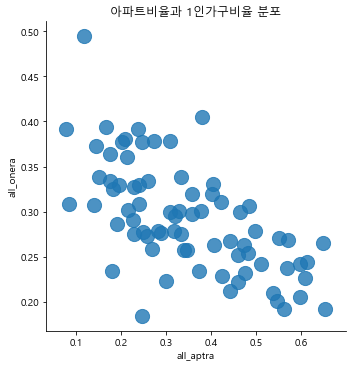

In [21]:
# 아파트 비율과 1인가구 비율에 따른 서울,경기 시군구의 분포
sns.lmplot('all_aptra','all_onera',data=sigunone, fit_reg = False, scatter_kws={"s":200})
plt.title('아파트비율과 1인가구비율 분포')

In [22]:
# 원래는 적정 군집 개수 찾아주는 기법으로 엘보우, 실루엣 , CCC 등을 활용해야함.
# 보통 적정 군집개수가 3~4개로 나오기 때문에  4개로 임의로 정하고 시작함

In [23]:
sigunone2 = sigunone

In [24]:
#필요한 열만
sigunone3 = sigunone2.loc[:,['all_aptra','all_onera']]
sigunone3

,all_aptra,all_onera
0,0.2605,0.3336
1,0.1667,0.3938
2,0.3792,0.4051
3,0.2036,0.3772
4,0.3335,0.3379
...,...,...
70,0.2412,0.3087
71,0.2276,0.2905
72,0.2413,0.3294
73,0.1510,0.3380


In [25]:
kmeans = KMeans(n_clusters=3,algorithm='auto')
kmeans.fit(sigunone3)
sigunone3['cluster']= kmeans.labels_
sigunone3.head()

,all_aptra,all_onera,cluster
0,0.2605,0.3336,0
1,0.1667,0.3938,0
2,0.3792,0.4051,2
3,0.2036,0.3772,0
4,0.3335,0.3379,2


In [26]:
#다시 시군구 옆에 붙여주기 위해서 
sigunone4 = sigunone2.loc[:,['sigun','all_onera']]
sigunone4.head()

,sigun,all_onera
0,서울특별시,0.3336
1,종로구,0.3938
2,중구,0.4051
3,용산구,0.3772
4,성동구,0.3379


In [27]:
#  시군구별 클러스터 생성완료 
sigun5 = pd.merge(sigunone3, sigunone4)
sigun5

,all_aptra,all_onera,cluster,sigun
0,0.2605,0.3336,0,서울특별시
1,0.1667,0.3938,0,종로구
2,0.3792,0.4051,2,중구
3,0.2036,0.3772,0,용산구
4,0.3335,0.3379,2,성동구
...,...,...,...,...
70,0.2412,0.3087,0,포천시
71,0.2276,0.2905,0,여주시
72,0.2413,0.3294,0,연천군
73,0.1510,0.3380,0,가평군


In [28]:
sigun5.sort_values(by="cluster", ascending=True)

,all_aptra,all_onera,cluster,sigun
0,0.2605,0.3336,0,서울특별시
72,0.2413,0.3294,0,연천군
71,0.2276,0.2905,0,여주시
70,0.2412,0.3087,0,포천시
68,0.1811,0.2340,0,광주시
...,...,...,...,...
40,0.3400,0.2572,2,부천시
42,0.4224,0.3102,2,평택시
46,0.3210,0.2952,2,단원구
27,0.3280,0.3003,2,수원시


Text(0.5113, 0.2414, '고양시')

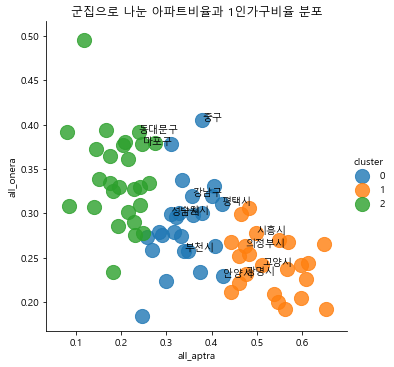

In [42]:
# 아파트 비율과 1인가구 비율에 따른 서울,경기 시군구의 분포
sns.lmplot('all_aptra','all_onera',data=sigun5, fit_reg = False, scatter_kws={"s":200},hue="cluster")
plt.title('군집으로 나눈 아파트비율과 1인가구비율 분포')
plt.text(0.4988,0.2780,'시흥시')
plt.text(0.3577,0.3199,'강남구')
plt.text(0.328,0.3003,'수원시')
plt.text(0.3093,0.2992,'성남시')
plt.text(0.4736,0.2631,'의정부시')
plt.text(0.4256,0.2289,'안양시')
plt.text(0.34,0.2572,'부천시')
plt.text(0.4756,0.2316,'광명시')
plt.text(0.3792,0.4051,'중구')
plt.text(0.2391,0.392,'동대문구')
plt.text(0.4224,0.3102,'평택시')
plt.text(0.2467,0.3777,'마포구')
plt.text(0.5113,0.2414,'고양시')
# 군집1. 아파트비율이 10~20% 사이면서 1인가구 비율이 25%~ 40% 사이 집단
# 군집2. 아파트비율이 20~40% 사이면서 1인가구 비율이 20%~ 35% 사이 집단
# 군집3. 아파트비율이 40~60% 사이면서 1인가구 비율이 20%~ 30% 사이 집단 으로 나누어짐

# 나름 의미있는 세 집단으로 분류되었으며, 분류된 특성에 따라 배달을 시켜먹는 음식의 차이등이 있을것으로 판단되어

# 1인가구 아파트 비율로 구한 군집 데이터 + 배달 데이터 MERGE

In [65]:
# 우선 merge를 위해 변수명 변경
sigun5 = sigun5.rename({'sigun':'gu_name'}, axis='columns')
sigun5['gu_name'] = sigun5['gu_name'].astype(str)
sigun5

,all_aptra,all_onera,cluster,gu_name
0,0.2605,0.3336,2,서울특별시
1,0.1667,0.3938,2,종로구
2,0.3792,0.4051,0,중구
3,0.2036,0.3772,2,용산구
4,0.3335,0.3379,0,성동구
...,...,...,...,...
70,0.2412,0.3087,2,포천시
71,0.2276,0.2905,2,여주시
72,0.2413,0.3294,2,연천군
73,0.1510,0.3380,2,가평군


In [66]:
# 경기도와 서울특별시의 시군구별 주문한 업종 카운트
ss = sudo.groupby(['gu_name']).size().reset_index(name='count')
ss['gu_name'] = ss['gu_name'].astype(str)
ss.head()

,gu_name,count
0,가평군,1
1,강동구,6
2,강북구,1894
3,강서구,920
4,고양시 덕양구,215928


In [68]:
ss.columns.names = ["index"]
ss

index,gu_name,count
0,가평군,1
1,강동구,6
2,강북구,1894
3,강서구,920
4,고양시 덕양구,215928
...,...,...
56,파주시,10416
57,평택시,106070
58,포천시,56921
59,하남시,11


In [40]:
sigun5.columns.names = ["index"]
sigun5

index,all_aptra,all_onera,cluster,sigun
0,0.2605,0.3336,0,서울특별시
1,0.1667,0.3938,0,종로구
2,0.3792,0.4051,2,중구
3,0.2036,0.3772,0,용산구
4,0.3335,0.3379,2,성동구
...,...,...,...,...
70,0.2412,0.3087,0,포천시
71,0.2276,0.2905,0,여주시
72,0.2413,0.3294,0,연천군
73,0.1510,0.3380,0,가평군


In [44]:
sigun6 = pd.merge(sudo, sigun5, how='inner', left_on='gu_name', right_on='sigun')
sigun6

,PROCESS_DT,DLVR_STORE_ID,si_name,gu_name,dong_name,adstrd_code,DLVR_DSTN_RDNMADR_CODE,induty_nm,GOODS_AMOUNT,SETLE_KND_VALUE,DLVR_RCEPT_TIME,year,month,all_aptra,all_onera,cluster,sigun


* 위 분석은 merge 가 제대로 이루어지지 않아 데이터 연계 분석을 하지못했다.

# COVID 확진자수 사망자수 날짜별

# 코로나 확진자수와 배달 업종간의 상관관계 찾기

In [ ]:
# 지역별 코로나 확진자료를 구하지 못하여 전체 코로나 일별 확진자 데이터
# 통계청에서 가져와 날짜 별로 연계하였음.
# 확진자 증가에 따른 배달건수 증가가 어느정도 연관성이 있는지 확인하기위해

In [93]:
covid_conf=pd.read_excel('../data/covid_conf.xlsx',sheet_name=0)

covid_conf.head()

,datetime,conf,death
0,2020. 02. 04,18,0
1,2020. 02. 05,1,0
2,2020. 02. 06,4,0
3,2020. 02. 07,1,0
4,2020. 02. 08,0,0


In [94]:
# 만들어준 deliverycount 열의 PROCESS_DT 열의 형식이 문자열로 되어있어 datetime으로 변경해줌
covid_conf['PROCESS_DT'] = pd.to_datetime(covid_conf['datetime'], format='%Y. %m. %d')

covid_conf.head()

,datetime,conf,death,PROCESS_DT
0,2020. 02. 04,18,0,2020-02-04
1,2020. 02. 05,1,0,2020-02-05
2,2020. 02. 06,4,0,2020-02-06
3,2020. 02. 07,1,0,2020-02-07
4,2020. 02. 08,0,0,2020-02-08


In [95]:
# 기존 날짜 삭제
covid_conf.drop(['datetime'], axis='columns', inplace=True)        
covid_conf.head()

,conf,death,PROCESS_DT
0,18,0,2020-02-04
1,1,0,2020-02-05
2,4,0,2020-02-06
3,1,0,2020-02-07
4,0,0,2020-02-08


# 날짜 별로 업종별 그래프를 그려보고 증가하는 추세인지 확인

In [55]:
# 한식만 뽑아냄
kkk = del_dstn['induty_nm'] == '한식'
kkk1 = del_dstn[kkk]

In [72]:
# 그룹1에서 많이시키는 빈도
kkk11 = kkk1.groupby(['PROCESS_DT']).size().reset_index(name='count')

In [74]:
# 열이름 간단하게 변경
kkk11 = kkk11.rename({'count':'koreaf'}, axis = 'columns')

In [75]:
# 막대 그래프 그리기
trace1 = go.Bar(x=kkk11['PROCESS_DT'], y=kkk11['koreaf'])
data = [trace1]
layout = go.Layout(title='날짜별 한식빈도')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [79]:
# 치킨만 뽑아냄
kkkk = del_dstn['induty_nm'] == '치킨'
kkk2 = del_dstn[kkkk]

In [80]:
# 그룹1에서 많이시키는 빈도
kkk2 = kkk2.groupby(['PROCESS_DT']).size().reset_index(name='count')

In [81]:
# 열이름 간단하게 변경
kkk2 = kkk2.rename({'count':'chik'}, axis = 'columns')

In [82]:
# 막대 그래프 그리기
trace1 = go.Bar(x=kkk2['PROCESS_DT'], y=kkk2['chik'])
data = [trace1]
layout = go.Layout(title='날짜별 치킨빈도')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [83]:
# 도시락만 뽑아냄
kkkkk = del_dstn['induty_nm'] == '도시락'
kkk3 = del_dstn[kkkkk]

In [84]:
# 그룹1에서 많이시키는 빈도
kkk3 = kkk3.groupby(['PROCESS_DT']).size().reset_index(name='count')

In [85]:
# 열이름 간단하게 변경
kkk3 = kkk3.rename({'count':'dosi'}, axis = 'columns')

In [87]:
# 막대 그래프 그리기
trace1 = go.Bar(x=kkk3['PROCESS_DT'], y=kkk3['dosi'])
data = [trace1]
layout = go.Layout(title='날짜별 도시락빈도')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [88]:
# 분식만 뽑아냄
kkkkkk = del_dstn['induty_nm'] == '분식'
kkk4 = del_dstn[kkkkkk]

In [89]:
# 그룹1에서 많이시키는 빈도
kkk4 = kkk4.groupby(['PROCESS_DT']).size().reset_index(name='count')

In [90]:
# 열이름 간단하게 변경
kkk4 = kkk4.rename({'count':'bun'}, axis = 'columns')

In [92]:
# 막대 그래프 그리기
trace1 = go.Bar(x=kkk4['PROCESS_DT'], y=kkk4['bun'])
data = [trace1]
layout = go.Layout(title='날짜별 분식 빈도')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [106]:
# 카페/디저트만 뽑아냄
kkkkkkk = del_dstn['induty_nm'] == '카페/디저트'
kkk5 = del_dstn[kkkkkkk]

In [107]:
# 그룹1에서 많이시키는 빈도
kkk5 = kkk5.groupby(['PROCESS_DT']).size().reset_index(name='count')

In [108]:
# 열이름 간단하게 변경
kkk5 = kkk5.rename({'count':'cafe'}, axis = 'columns')

In [109]:
# 막대 그래프 그리기
trace1 = go.Bar(x=kkk5['PROCESS_DT'], y=kkk5['cafe'])
data = [trace1]
layout = go.Layout(title='날짜별 카페/디저트 빈도')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [111]:

k_new = pd.merge(kkk11, kkk2)
k_new2 = pd.merge(k_new, kkk3)
k_new3 = pd.merge(k_new2, kkk4)
k_new4 = pd.merge(k_new3, kkk5)
k_new5 = pd.merge(k_new4, covid_conf)
k_new5

,PROCESS_DT,koreaf,chik,dosi,bun,cafe,conf,death
0,2020-02-04,3340,6339,300,3932,1907,18,0
1,2020-02-05,3645,7062,321,4053,2141,1,0
2,2020-02-06,3778,7132,345,3982,2204,4,0
3,2020-02-07,3560,7493,406,3933,2418,1,0
4,2020-02-08,4038,8487,327,4445,3463,0,0
...,...,...,...,...,...,...,...,...
126,2020-06-10,5188,8201,352,3673,2741,50,2
127,2020-06-11,4886,6835,358,3641,2849,45,0
128,2020-06-12,5052,9019,304,4054,3068,56,1
129,2020-06-20,5999,9803,314,4382,4457,67,0


In [113]:
corr = k_new5.corr(method = 'pearson')
corr

,koreaf,chik,dosi,bun,cafe,conf,death
koreaf,1.000000,0.723531,-0.553566,0.725394,0.612435,-0.194633,-0.394784
chik,0.723531,1.000000,-0.541650,0.843369,0.743187,0.042288,-0.130002
dosi,-0.553566,-0.541650,1.000000,-0.676854,-0.622651,0.106051,-0.023090
bun,0.725394,0.843369,-0.676854,1.000000,0.749263,-0.095898,-0.090228
cafe,0.612435,0.743187,-0.622651,0.749263,1.000000,0.120280,-0.009914
conf,-0.194633,0.042288,0.106051,-0.095898,0.120280,1.000000,0.307706
death,-0.394784,-0.130002,-0.023090,-0.090228,-0.009914,0.307706,1.000000


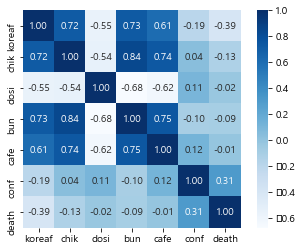

In [114]:
# 히트맵 이미지 , 상관분석을 시각화하여 쉽게 볼 수 있는 방법


import matplotlib.pyplot as plt 
import seaborn as sns

df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Blues')


# 결과
* 날짜가 지나감에 따라 확진자수와 배달음식의 유의미한 상관관계를 가지는  변수는 
* 카페 디저트의 경우 가장 유의미하게 12%의 상관관계를 가지며
* 도시락이  11% 의 상관관계를 가진다고 볼 수 있다.
* 즉 코로나가 증가에 따라 카페/디저트 및 도시락 업체 등이 혜택을 받았다는것을 확인할 수 있었다.

# 결론
* 위 결과에 대한 해석으로 코로나19 확산으로인한 사회적거리두기 2단계가 실시되었던 시기이며
* 보통 회사에서 점심시간등을 이용하여 외부로 나가서 먹는 빈도가 줄어든 대신
* 도시락, 카페음료 등을 배달로 시켜먹는 추세로 바뀌어진것을 위 결과를 토대로 추론해볼 수 있었다.